**Processing Data Scrape from Twitter**

In [4]:
import pandas as pd

# GitHub raw data link (replace with your dataset link)
github_link = 'https://raw.githubusercontent.com/GAYANILIYANAGE/Project3_datascience/main/FacebookDown.csv'

# Read the dataset into a pandas DataFrame with original column names
df = pd.read_csv(github_link)

# Display the first few rows of the DataFrame with new column names
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1445126577059209217,1445126577059209217,2021-10-04 20:39:59 UTC,2021-10-04,20:39:59,0,855454197185220608,shambacboy,@SHAMBAcboy,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1445126576224473092,1445126576224473092,2021-10-04 20:39:59 UTC,2021-10-04,20:39:59,0,19971354,jimbostudios,Jimbo Wilmshurst,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1445126575477833729,1445126575477833729,2021-10-04 20:39:59 UTC,2021-10-04,20:39:59,0,790784188681039872,manav_dave_24,𝕸𝖆𝖓𝖆𝖛 𝕯𝖆𝖛𝖊,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1445126573963845637,1445126573963845637,2021-10-04 20:39:59 UTC,2021-10-04,20:39:59,0,587327719,tomhyoos,Tom Hyoos (IPA: /'tɒm/ /hjuːz/),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1445126573124952071,1445126573124952071,2021-10-04 20:39:58 UTC,2021-10-04,20:39:58,0,460078574,anonymouszhax,🅰🅽🅾🅽🆈🅼🅾🆄🆂🏴,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
#Shape of the datafarame
print("Shape of the dataframe: " + str(df.shape))

Shape of the dataframe: (29733, 36)


**Data Analysis**

Rows with missing values in the 'tweet' column have been removed.


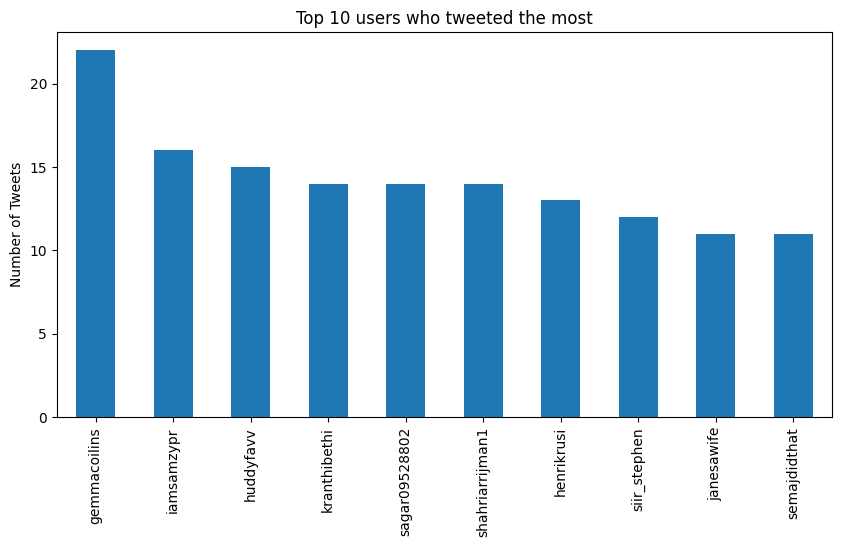

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

if 'tweet' in df.columns and 'likes_count' in df.columns and 'replies_count' in df.columns and 'retweets_count' in df.columns:
    # Drop rows with missing values in the 'tweet' column
    df_twitter = df.dropna(subset=['tweet']).copy()
    print("Rows with missing values in the 'tweet' column have been removed.")

    # Select the most liked tweets
    most_liked_tweets = df_twitter.nlargest(10, 'likes_count')[['username', 'name', 'tweet', 'likes_count', 'replies_count', 'retweets_count']]

    # Plot the top 10 users who tweeted the most
    top_users_plot = df_twitter['username'].value_counts().nlargest(10).plot(kind='bar', title="Top 10 users who tweeted the most",figsize=(10, 5))
    top_users_plot.set_ylabel("Number of Tweets")
    plt.show()
else:
    print("Required columns are missing in the DataFrame.")


In [8]:
!python -m spacy download en_core_web_lg

2023-11-12 11:57:28.349762: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 11:57:28.349854: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 11:57:28.349892: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 11:57:28.360684: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 11:57:29.641618: W tensorflow/compiler/

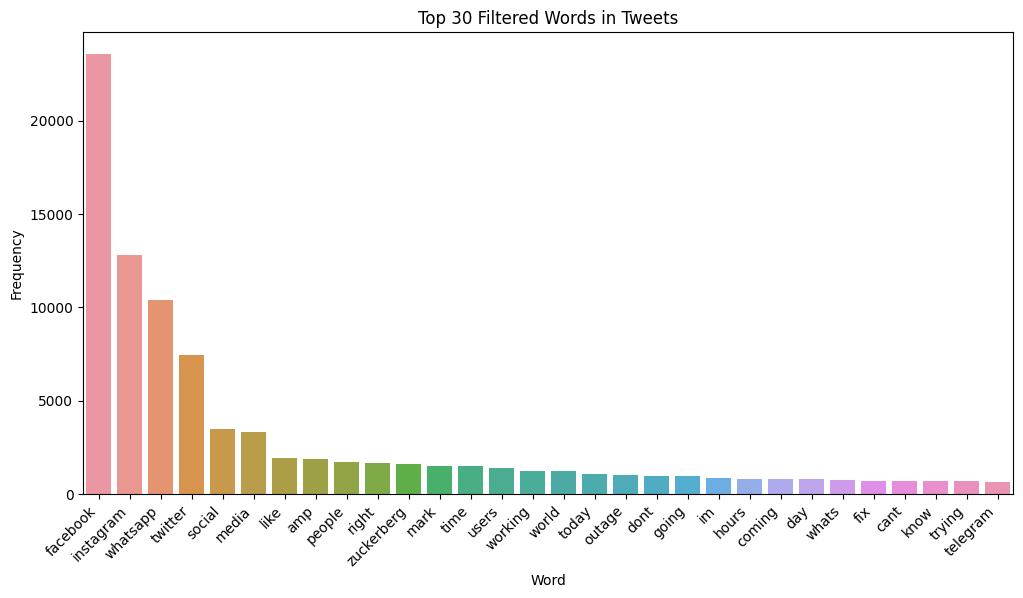

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
import seaborn as sns

nlp = spacy.load("en_core_web_lg")

tweet_sentences = [word.lower() for sentence in df_twitter.tweet for word in sentence.split() if not word.startswith('#')]
cleaned_words = [re.sub(r'[^a-zA-Z0-9]+', '', word) for word in tweet_sentences if word != '']

# Remove stop words using spacy
stop_words = set(spacy.lang.en.stop_words.STOP_WORDS)
filtered_words = [word for word in cleaned_words if word not in stop_words and word != '']

word_column_name = ['Filtered_Word']
df_filtered_words = pd.DataFrame(filtered_words, columns=word_column_name)

# Counting word frequencies
word_counts = df_filtered_words['Filtered_Word'].value_counts().reset_index()
word_counts.columns = ['Word', 'Frequency']

# Plotting top 30 words
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_counts.head(30))
plt.title('Top 30 Filtered Words in Tweets')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


**Word Cloud**

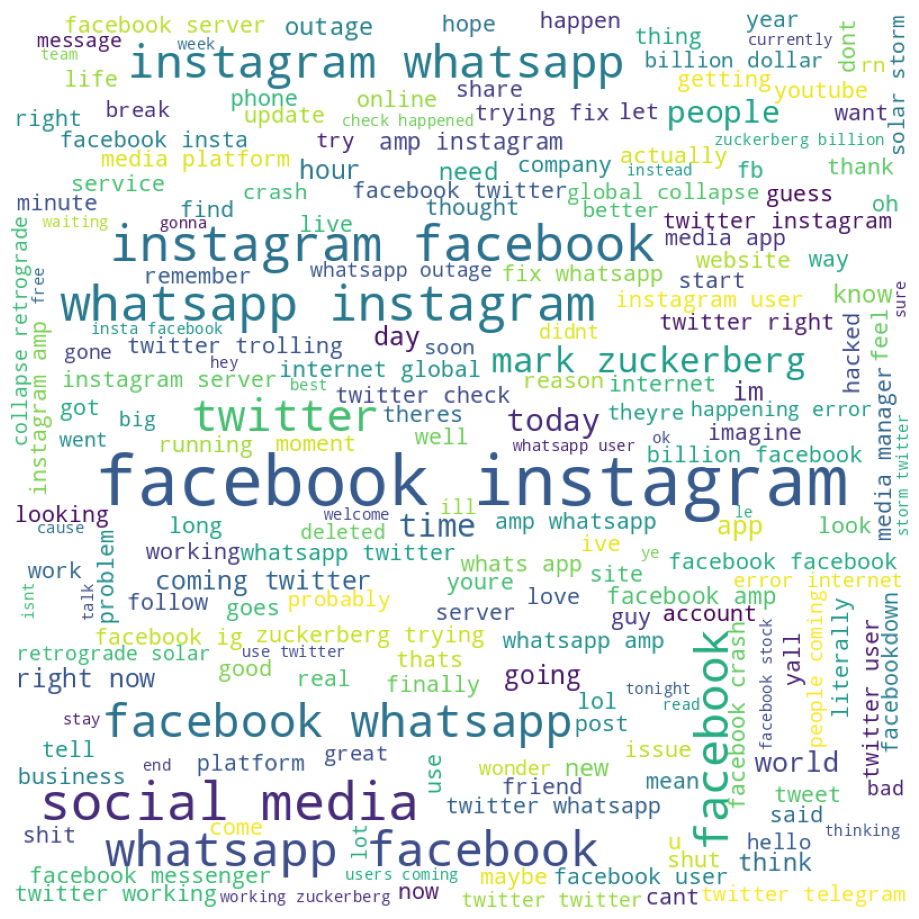

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_lg")

tweet_sentences = [word.lower() for sentence in df_twitter.tweet for word in sentence.split() if not word.startswith('#')]
filtered_words = [re.sub(r'[^a-zA-Z0-9]+', '', word) for word in tweet_sentences if word not in spacy.lang.en.stop_words.STOP_WORDS and word != '']

# Create a WordCloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(' '.join(filtered_words))

# Plot the WordCloud
plt.figure(figsize=(9, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


**Clasify Emotions**

In [11]:
pip install -U feel-it

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.1 MB/s eta 0:00:00


In [12]:
from feel_it import EmotionClassifier, SentimentClassifier

sentiment_classifier = SentimentClassifier()
emotion_classifier = EmotionClassifier()

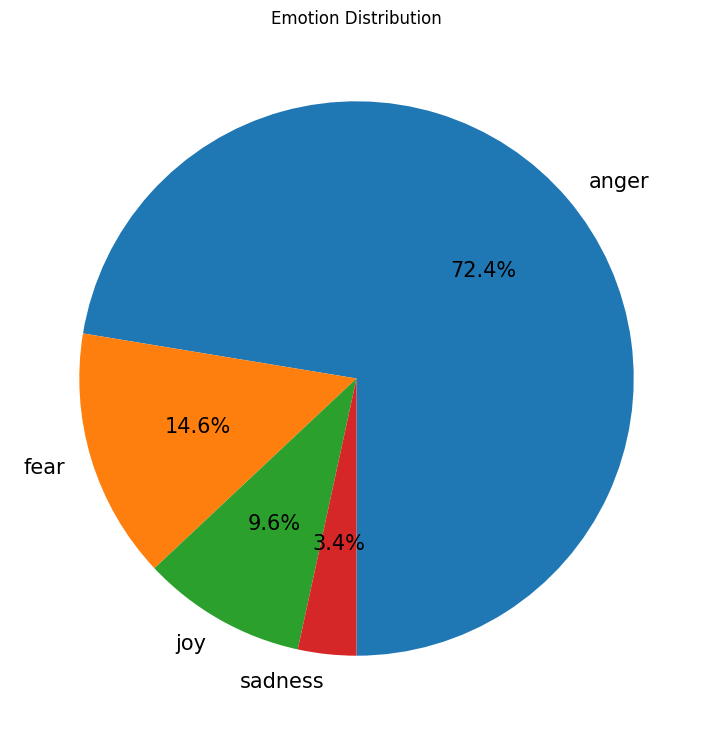

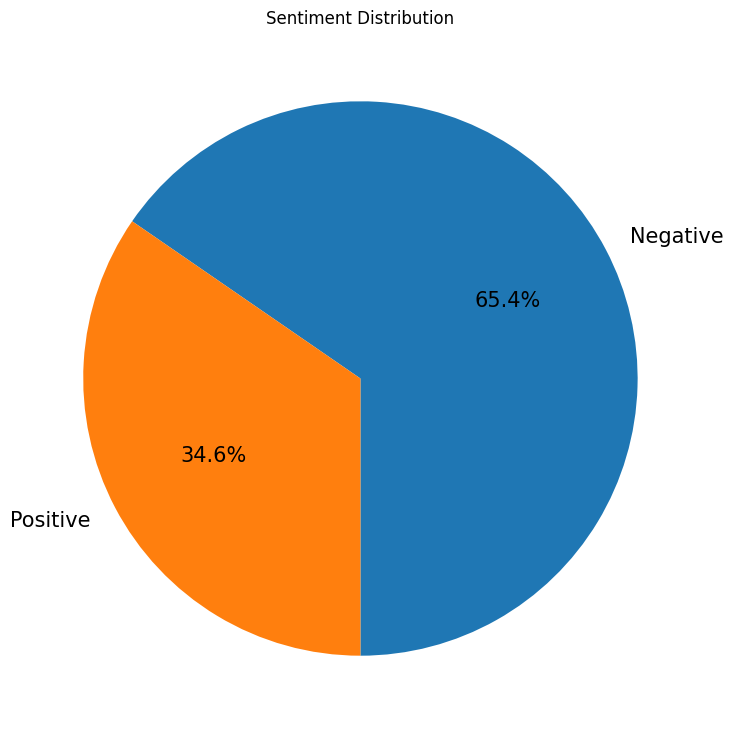

In [13]:
import matplotlib.pyplot as plt
from textblob import TextBlob
import pandas as pd

df_emotion = df.loc[df.likes_count.nlargest(500).index]

# Function to classify emotion using a sample classifier (replace with your actual classifier)
def predict_emotion(text):
    # Implementation using TextBlob's sentiment analysis
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.3:
        return 'joy'
    elif analysis.sentiment.polarity < -0.3:
        return 'sadness'
    elif analysis.sentiment.subjectivity > 0.5:
        return 'fear'
    else:
        return 'anger'

# Apply emotion prediction to the 'tweet' column
df_emotion['Emotion'] = df_emotion['tweet'].apply(predict_emotion)

# Plot the emotion distribution
plt.figure(figsize=(9, 9))
df_emotion['Emotion'].value_counts().plot(kind='pie', autopct='%0.1f%%', startangle=270, fontsize=15, label='')
plt.title('Emotion Distribution')
plt.show()

# Function to classify sentiment using a sample classifier (replace with your actual classifier)
def predict_sentiment(text):
    # Sample implementation using TextBlob's sentiment analysis
    analysis = TextBlob(text)
    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative'

# Apply sentiment prediction to the 'tweet' column
df_emotion['Sentiment'] = df_emotion['tweet'].apply(predict_sentiment)

# Plot the sentiment distribution
plt.figure(figsize=(9, 9))
df_emotion['Sentiment'].value_counts().plot(kind='pie', autopct='%0.1f%%', startangle=270, fontsize=15, label='')
plt.title('Sentiment Distribution')
plt.show()


**Network Analysis**

In [14]:
import itertools
import pandas as pd

# Select the top 100 tweets based on the 'likes_count'
top_100_tweets = df.loc[df.likes_count.nlargest(100).index]

# Create an empty DataFrame to store edges
edges = pd.DataFrame(
    # List comprehension to generate tuples of combinations of hashtags
    [(n[0], n[1]) for _, row in top_100_tweets.iterrows()
     for n in itertools.combinations(row['hashtags'].replace(" ", "").replace('\'', '')[1:-1].split(','), 2)],
    # Set column names for the DataFrame
    columns=['col1', 'col2']
)


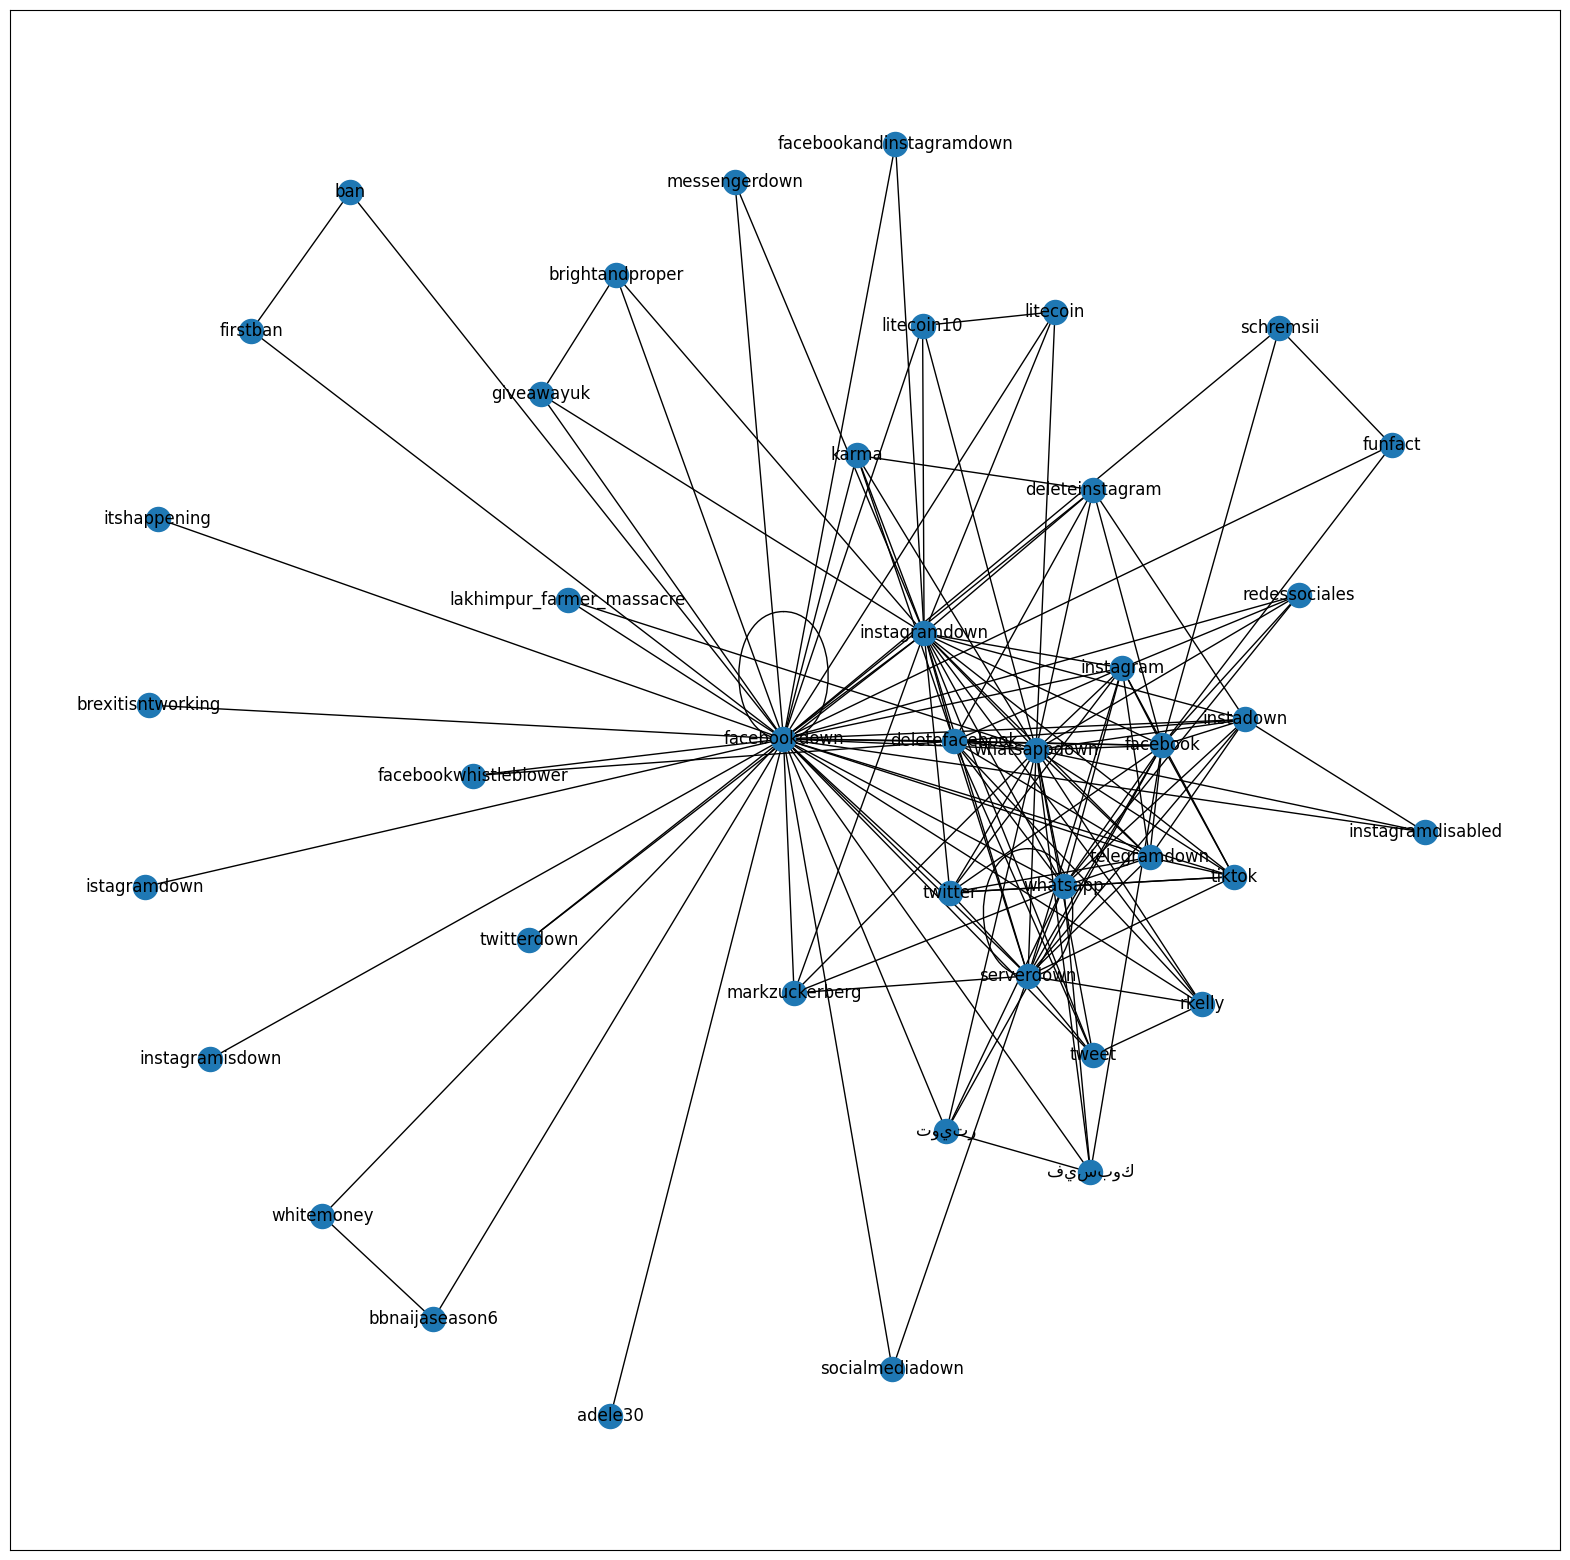

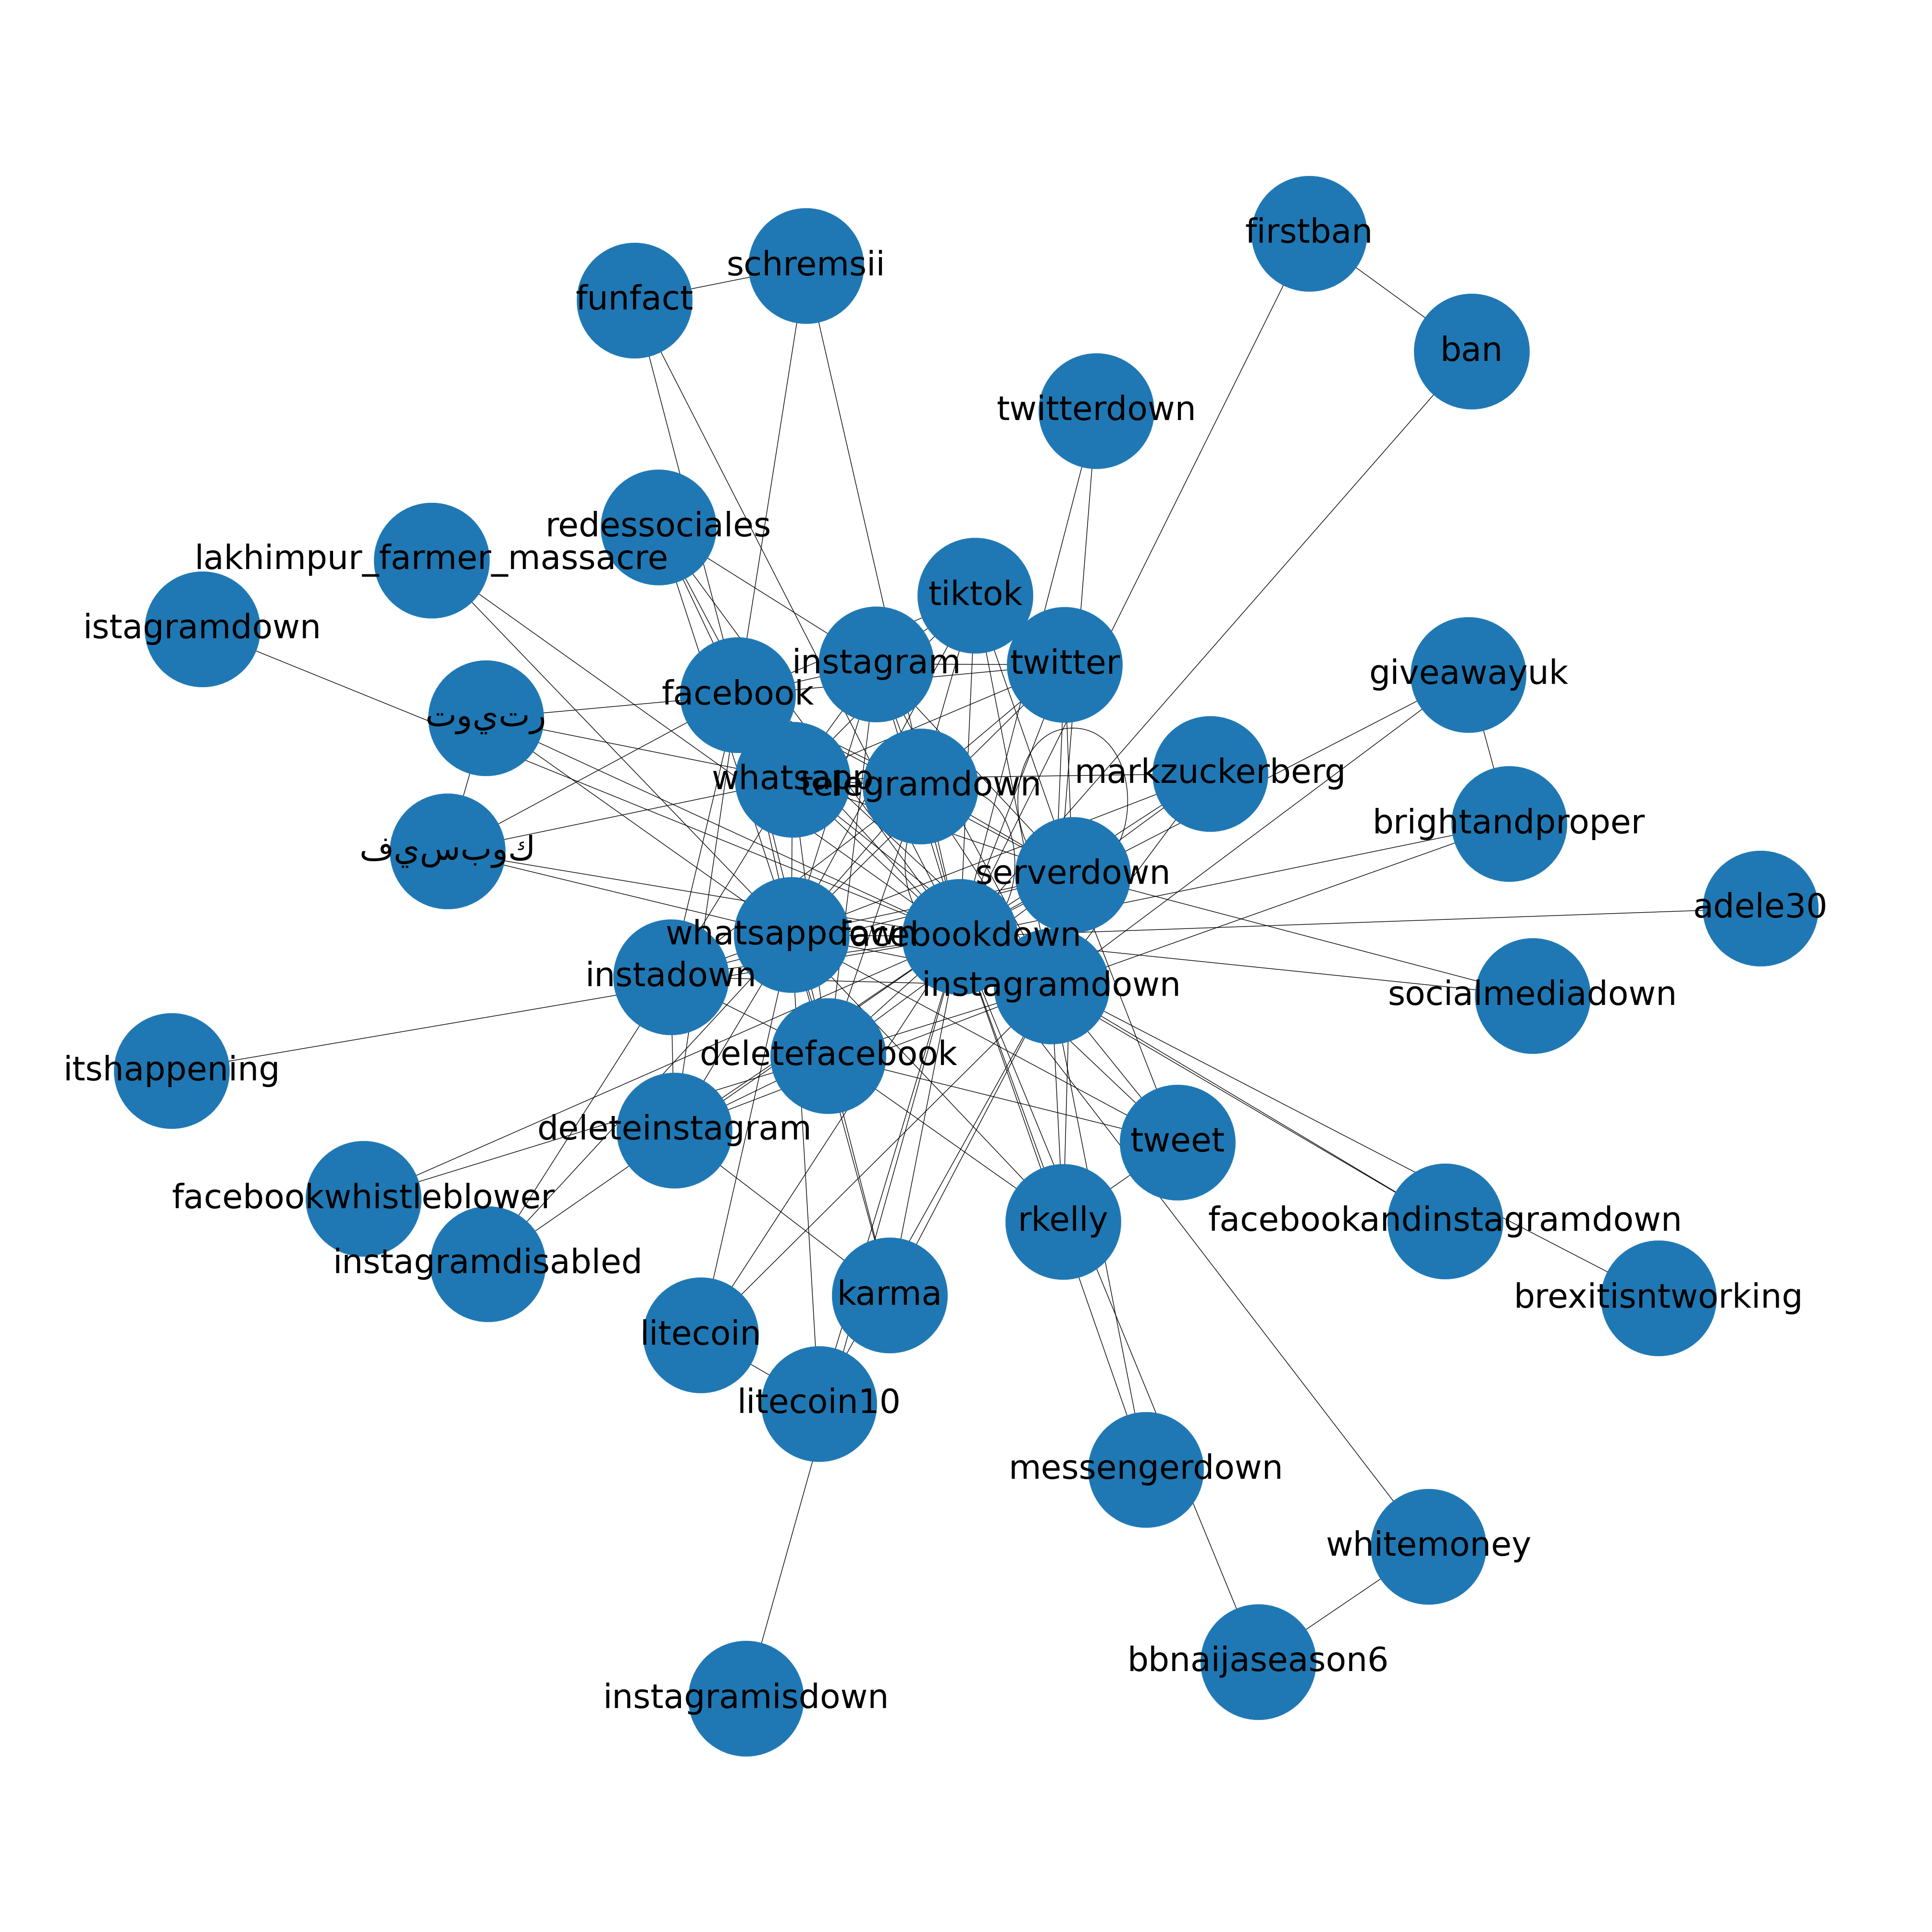

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty undirected graph
G = nx.Graph()

# Convert DataFrame edges to a list of tuples
edges_tuples = [tuple(edges.iloc[i]) for i in range(len(edges))]

# Add edges to the graph with a default weight of 1
G.add_edges_from(edges_tuples, weight=1)

# Draw the network graph with labels using Matplotlib
plt.figure(figsize=(20, 20))
nx.draw_networkx(G, with_labels=True)

# Display the first graph
plt.show()

# Create a new figure with a larger size
fig = plt.figure(figsize=(40, 40))

# Draw the network graph with adjusted parameters
nx.draw(G, node_size=30000, font_size=50, with_labels=True, linewidths=0.25)

# Set axis equal for a more proportional representation
plt.axis('equal')

# Display the second graph
plt.show()


In [17]:
print(G)

Graph with 42 nodes and 147 edges
